# Project "Know_Your_Rent_Muc": Part Two
# EDA (Exploratory Data Analysis)

In this part I explore the data to get more inside information about them. This process is importent to understand the data. With out a deep data understanding it´s going to be difficult to create a good machine learning model.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First of all I look at the first 5 rows of the data. I look at them and analyse which data types are there.

In [2]:
df = pd.read_csv("221211_know_your_rent_muc_data.csv")

In [3]:
df.head()

,Unnamed: 0,"""enh_impression_list""","""enh_impression_name""","""enh_impression_position""","""search_sortby""","""object_area""","""object_city""","""object_currency""","""object_display_state""","""object_district""",...,"""object_is_special""","""object_label""","""object_marketingtype""","""object_objekt_nutzungsart""","""object_objekt_zustand""","""object_objektart""","""object_objektart_sub""","""object_price""","""object_rooms""","""object_listingtype"""
0,0,Liste,kontakt,1.0,2594468.0,37.00,München,EUR,sel_item,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,...,NaN,new,Miete,WOHNEN,sonstiges,NaN,APARTMENT,1120.00,1.0,standard
1,1,Liste,kontakt,2.0,177005.0,53.06,München,EUR,sel_item,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,...,top-immo,old,Miete,WOHNEN,sonstiges,NaN,ETAGE,1339.77,2.0,premium
2,2,Liste,kontakt,3.0,177005.0,64.16,München,EUR,sel_item,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,...,top-immo,old,Miete,WOHNEN,sonstiges,NaN,ETAGE,1509.68,2.0,premium
3,3,Liste,kontakt,4.0,177005.0,49.46,München,EUR,sel_item,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,...,top-immo,old,Miete,WOHNEN,sonstiges,NaN,ERDGESCHOSS,1600.03,2.0,premium
4,4,Liste,kontakt,5.0,177005.0,96.23,München,EUR,sel_item,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,...,top-immo,old,Miete,WOHNEN,sonstiges,NaN,ETAGE,2085.30,4.0,premium


Here are the datatypes of the columns. The datatypes are automatically generated through pandas. Pandas does this most of the time right but were can be mistakes. Examples are that a discrete variable is declared as a continuouse variable. 

In [4]:
df.dtypes

Unnamed: 0                       int64
"enh_impression_list"           object
"enh_impression_name"           object
"enh_impression_position"      float64
"search_sortby"                float64
"object_area"                  float64
"object_city"                   object
"object_currency"               object
"object_display_state"          object
"object_district"               object
"object_features"               object
"object_federalstate"           object
"object_gok"                    object
"object_is_special"             object
"object_label"                  object
"object_marketingtype"          object
"object_objekt_nutzungsart"     object
"object_objekt_zustand"         object
"object_objektart"             float64
"object_objektart_sub"          object
"object_price"                 float64
"object_rooms"                 float64
"object_listingtype"            object
dtype: object

Here is the summary of the obsarvation:
- The unnamed column are the id´s. The id´s are ordinal variables and needs to be transformed to a object. 
- The same is applicable to "enh_impression_position".
- The variable "search_sortby" is definitely a discret variable, because the variable doesn´t measure something. It need to be transformed to a integer. 
- The variable "object_area" measurement the room size in square feet. The float is here right declared.
- The variable "object_objektart" seems to have no entries. It can be deleted.
- The variable "object_price" is a discrete varibale and need to be transformed to a integer. 
- The same is applicable to "object_rooms".
- "object_label" is binar.

In [5]:
df.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

In [6]:
df['id'] = df['id'].astype("object")
df['"enh_impression_position"'] = df['"enh_impression_position"'].astype("string")
df['"search_sortby"'] = df['"search_sortby"'].astype("int")
df['"object_price"'] = df['"object_price"'].astype("int")
df['"object_rooms"'] = df['"object_rooms"'].astype("int")
df1 = df.drop('"object_objektart"', axis=1)

In [7]:
df1.dtypes

id                              object
"enh_impression_list"           object
"enh_impression_name"           object
"enh_impression_position"       string
"search_sortby"                  int64
"object_area"                  float64
"object_city"                   object
"object_currency"               object
"object_display_state"          object
"object_district"               object
"object_features"               object
"object_federalstate"           object
"object_gok"                    object
"object_is_special"             object
"object_label"                  object
"object_marketingtype"          object
"object_objekt_nutzungsart"     object
"object_objekt_zustand"         object
"object_objektart_sub"          object
"object_price"                   int64
"object_rooms"                   int64
"object_listingtype"            object
dtype: object

Now, it´s importent to know which unique values are in the object columns. This helps to understand which columns have a lot of information in it and which not. It also tells me if there are similarity in different columns. The column "object_gok" seems like that is just a intern code of the object from the website. It can be also deleted. 

In [8]:
def unique_values(df):
    for i in df.columns:
        if df[i].dtypes == "object" and i!="id" and i!='"object_gok"':
            print(i)
            print(df[i].unique())
            print("------------------")

In [9]:
unique_values(df1)

"enh_impression_list"
['Liste' 'Liste_Objekte_passend']
------------------
"enh_impression_name"
['kontakt']
------------------
"object_city"
['München' 'Haar' 'Neubiberg' 'Aschheim' 'Ottobrunn' 'Vaterstetten'
 'Kirchheim' 'Unterhaching' 'Unterföhring' 'Hergolding' 'Hohenbrunn'
 'Taufkirchen' 'Zorneding' 'Poing' 'Höhenkirchen-Siegertsbrunn'
 'Oberhaching' 'Garching' 'Brunnthal' 'Kirchseeon' 'Markt Schwaben'
 'Unterschleißheim' 'Planegg' 'Gräfelfing' 'Sauerlach' 'Karlsfeld' 'Glonn'
 'Eching' 'Krailling' 'Neufahrn' 'Gauting' 'Hallbergmoos' 'Wörth'
 'Ebersberg' 'Grafing' 'Germering' 'Dachau' 'Forstern' 'Haimhausen'
 'Oberding' 'Gröbenzell' 'Erding' 'Dietramszell' 'Puchheim' 'Tuntenhausen'
 'Eichenau' 'Holzkirchen' 'Olching' 'Aßling' 'Starnberg' 'Bergkirchen'
 'Gilching' 'Isen' 'Lengdorf' 'Freising' 'Wolfratshausen' 'Bockhorn'
 'Geretsried' 'Fürstenfeldbruck' 'Vierkirchen' 'Maisach' 'Marzling' 'Haag'
 'Warngau' 'Berglern' 'Feldafing' 'Rechtmehring' 'Münsing' 'Weichs'
 'Waakirchen' 'Rott' '

Here is the summary of the obsarvation:
- "enh_impression_list" and "enh_impression_name", "object_currency", "object_display_state", "object_federalstate", "object_label", "object_marketingtype", "object_objekt_nutzungsart", "object_objekt_zustand" and "object_listingtype" one, respectively two kind of entries. And the entries have no information for the prediction of a rent. They will be deleted.
- The column "object_is_special" have more kind of values but with informations for the goal prediction.
- The column "object_district" and "object_city" seems to be similar. That need to be looked in detail.

In [28]:
df2 = df1.drop(['"object_gok"', '"enh_impression_list"', '"enh_impression_name"', '"object_currency"', '"object_display_state"', 
              '"object_federalstate"', '"object_label"', '"object_marketingtype"', '"object_objekt_nutzungsart"',
             '"object_objekt_zustand"', '"object_listingtype"', '"object_is_special"'], axis=1)

In [57]:
df2.head()

,id,"""enh_impression_position""","""search_sortby""","""object_area""","""object_city""","""object_district""","""object_features""","""object_objektart_sub""","""object_price""","""object_rooms"""
0,0,1.0,2594468,37.00,München,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,Balkon|EBK,APARTMENT,1120,1
1,1,2.0,177005,53.06,München,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,Balkon,ETAGE,1339,2
2,2,3.0,177005,64.16,München,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,NaN,ETAGE,1509,2
3,3,4.0,177005,49.46,München,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,NaN,ERDGESCHOSS,1600,2
4,4,5.0,177005,96.23,München,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,Balkon,ETAGE,2085,4


A closer look to the columns "object_city" and "object_district" tells me that the "object_district" value is for the value "München" in the column "object_city" the city district. For the other values in the column "object_district" they are smaller villages inside a village district. This villages aren´t located in Munich. They are located around the city.  
For the machine learning model I will just use the districs of Munich and not the villages around of the city.

To check how many rows I will lose I use the following function:

In [30]:
len(df2[df2['"object_city"']!='München'])

330

Now I will deleted all rows which are not located in munich. After that I delete the column "object_city", because it has after this operation no information value. 

In [32]:
df3 = df2.loc[df2['"object_city"']=='München']

In [59]:
df3.shape

(595, 10)

Now the column "object_city" can be deleted.

In [35]:
df4 = df3.drop('"object_city"', axis=1)

In [55]:
df4.head()

,id,"""enh_impression_position""","""search_sortby""","""object_area""","""object_district""","""object_features""","""object_objektart_sub""","""object_price""","""object_rooms"""
0,0,1.0,2594468,37.00,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,Balkon|EBK,APARTMENT,1120,1
1,1,2.0,177005,53.06,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,Balkon,ETAGE,1339,2
2,2,3.0,177005,64.16,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,NaN,ETAGE,1509,2
3,3,4.0,177005,49.46,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,NaN,ERDGESCHOSS,1600,2
4,4,5.0,177005,96.23,Thalk.Obersendl.-Forsten-Fürstenr.-Solln,Balkon,ETAGE,2085,4


Now I look closer to the categorical variables. Here I try to find out how often each unique value is occur in the columns. This gives me a feeling how the data is distribute and which values appears often or rare. Additionally I check how many different unique values there are.

In [39]:
df4['"object_district"'].value_counts(normalize=True) 

Thalk.Obersendl.-Forsten-Fürstenr.-Solln    0.125637
Aubing-Lochhausen-Langwied                  0.081494
Bogenhausen                                 0.073005
Ramersdorf-Perlach                          0.071307
Schwabing-Freimann                          0.067912
Neuhausen-Nymphenburg                       0.054329
Pasing-Obermenzing                          0.052632
Maxvorstadt                                 0.050934
Altstadt-Lehel                              0.042445
Ludwigsvorstadt-Isarvorstadt                0.037351
Untergiesing-Harlaching                     0.035654
Sendling                                    0.033956
Moosach                                     0.030560
Au-Haidhausen                               0.030560
Schwabing-West                              0.027165
Sendling-Westpark                           0.027165
Obergiesing                                 0.025467
Milbertshofen-Am Hart                       0.023769
Trudering-Riem                              0.

In [96]:
len(df4['"object_district"'].value_counts(normalize=True))

25

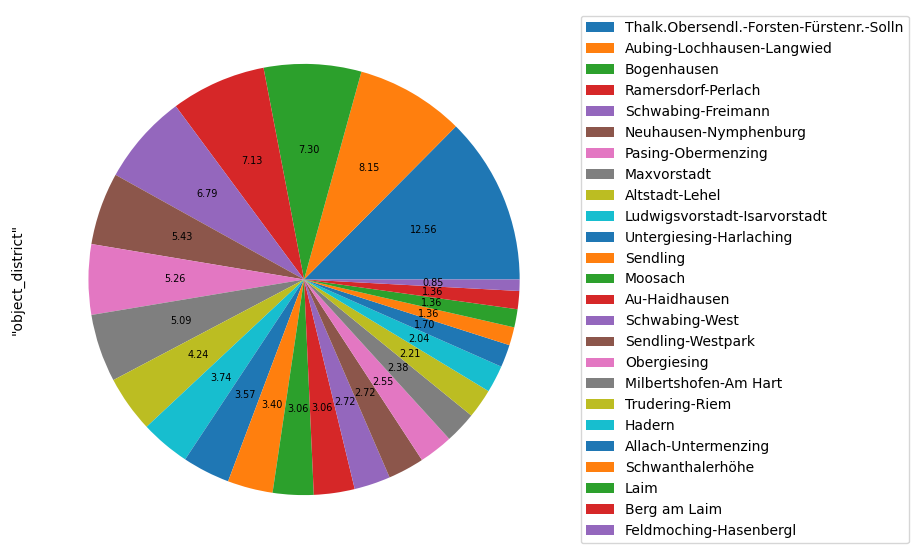

In [202]:
df4['"object_district"'].value_counts(normalize=True).plot.pie(autopct="%.2f" ,fontsize=7, figsize=(10,7), 
                                                               subplots=True, labeldistance=None, legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

The data in "object_district" is wide spreaded and how many different unique values (25). This means that there are no areas which have the most rentable flats. 
It seems like that most of the rentable flats are in structurally strong districts with high prices per square meter. 

In [38]:
df4['"object_objektart_sub"'].value_counts(normalize=True) 

Wohnung                0.366387
ETAGE                  0.324370
DACHGESCHOSS           0.089076
ERDGESCHOSS            0.084034
APARTMENT              0.065546
MAISONETTE             0.036975
PENTHOUSE              0.013445
LOFT-STUDIO-ATELIER    0.010084
SOUTERRAIN             0.010084
Name: "object_objektart_sub", dtype: float64

In [41]:
len(df4['"object_objektart_sub"'].value_counts(normalize=True))

9

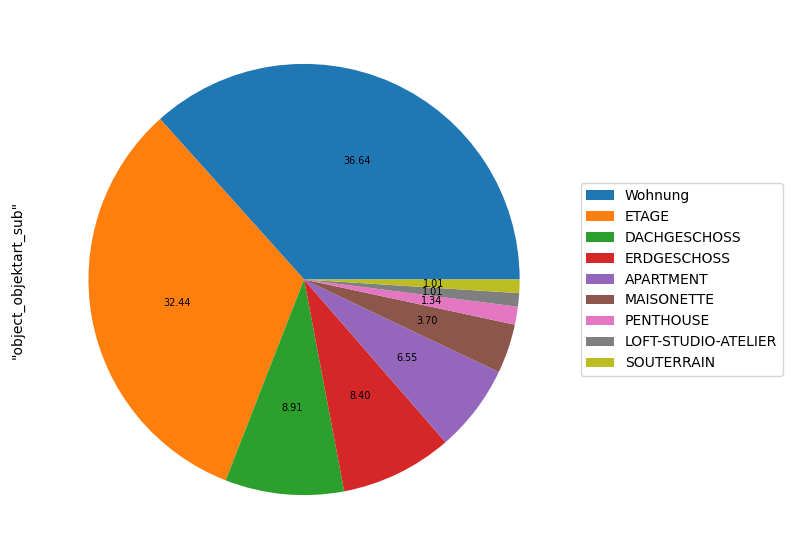

In [203]:
df4['"object_objektart_sub"'].value_counts(normalize=True).plot.pie(autopct="%.2f" ,fontsize=7, figsize=(10,7), 
                                                               subplots=True, labeldistance=None, legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In this column we see that almost 80% of the data are the values "Wohung", "ETAGE", "DACHGESCHOSS". Every value is here a specific kind of a flat, except the value "Wohnung". This a general expression for a flat. This means that all "Wohnung" values can inlcude one of the other values. This can inpurity can lead to a weak correlation to the target variable ("object_price"). 

This is a nice example of how importent it is to understand your data!

In [37]:
df4['"object_features"'].value_counts(normalize=True) 

Balkon|EBK           0.335227
Balkon               0.234848
EBK                  0.164773
Garten|Balkon|EBK    0.096591
Garten|EBK           0.085227
Garten|Balkon        0.049242
Garten               0.034091
Name: "object_features", dtype: float64

In [42]:
len(df4['"object_features"'].value_counts(normalize=True))

7

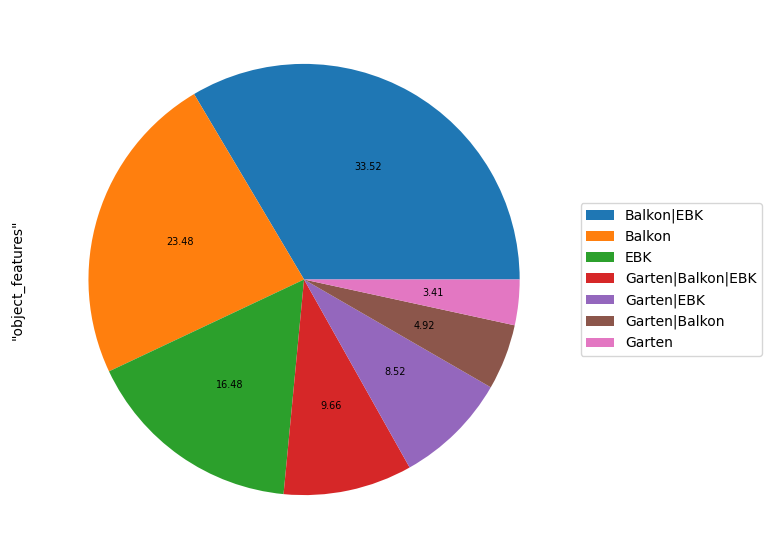

In [204]:
df4['"object_features"'].value_counts(normalize=True).plot.pie(autopct="%.2f" ,fontsize=7, figsize=(10,7), 
                                                               subplots=True, labeldistance=None, legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

The values of this column aren´t that spreaded like the values of "object_district". The values here are similar to "object_objektart_sub", except that here not so many "niche" values.
Most of the rentable flats have a equipped kitchen (>68%). Also, most of the flats have a balcony (73%). It´s unusual that almost 15% of the data have a garden and balcony. this can only be possible if it is a two storey house. I´m not sure if there are so many rentable houses in Munich. One option to check this is to look at the square meter of this sepecific data. If its bigger the 120m^2 than its probably a house. If not is maybe an error.

The next challenges will be to transform object data to numeric values. The challenge here is to choose the right technique, which not harm the machine learning modell.

Because all the object features are nominal the simplest method to encode them is the One-Hot Encoding. In the process each unique value each object column will be transformed to the value "1" and also get his own column. All other values in this column will be "0".

In [48]:
def one_hot_encoding(df):
    for i in df:
        if df[i].dtypes == "object" and i !="id":
            df = pd.get_dummies(data=df, columns=[i])
    return df

In [49]:
df5 = one_hot_encoding(df4)

In [63]:
df5.head()

,id,"""enh_impression_position""","""search_sortby""","""object_area""","""object_price""","""object_rooms""","""object_district""_Allach-Untermenzing","""object_district""_Altstadt-Lehel","""object_district""_Au-Haidhausen","""object_district""_Aubing-Lochhausen-Langwied",...,"""object_features""_Garten|EBK","""object_objektart_sub""_APARTMENT","""object_objektart_sub""_DACHGESCHOSS","""object_objektart_sub""_ERDGESCHOSS","""object_objektart_sub""_ETAGE","""object_objektart_sub""_LOFT-STUDIO-ATELIER","""object_objektart_sub""_MAISONETTE","""object_objektart_sub""_PENTHOUSE","""object_objektart_sub""_SOUTERRAIN","""object_objektart_sub""_Wohnung"
0,0,1.0,2594468,37.00,1120,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,2.0,177005,53.06,1339,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,3.0,177005,64.16,1509,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,4.0,177005,49.46,1600,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,5.0,177005,96.23,2085,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
df5.shape

(595, 47)

Now there are clearly more columns then before. This can be lead to overfitting model, but nevertheless this is for this kind of data type the best option. To solve the problems of a overfittung model there are other options.

The next part is to look closer to the numeric values.

The "enh_impression_position" and "search_sortby" functions count values from the website, from which the values were scraped. That´s why they can be deleted.

In [64]:
df6 = df5.drop(['"enh_impression_position"', '"search_sortby"'], axis=1)

Before I move further, I check if there are some missing values in the numeric features.

In [108]:
df6.isnull().iloc[:, :3].sum()

id                0
"object_area"     0
"object_price"    0
dtype: int64

Ok, there are no missing values. But may be there are implausible values.

In the following table are the statistic informations about numeric variables.

In [81]:
df6.describe().iloc[:, :3]

,"""object_area""","""object_price""","""object_rooms"""
count,595.000000,595.000000,595.000000
mean,80.993983,1938.295798,2.487395
std,51.139758,1185.486649,1.185388
min,0.000000,0.000000,0.000000
25%,53.000000,1280.000000,2.000000
50%,74.000000,1680.000000,2.000000
75%,94.480000,2160.000000,3.000000
max,565.970000,12300.000000,9.000000


I see here that there are zero values. This cann´t be truth. Let´s take a look at them, if I can find a systematic. After that I can delete them. 

In [135]:
print(df6[df6['"object_area"']==0.0].count()[0])
df6[df6['"object_area"']==0.0].iloc[:, :4]

6


,id,"""object_area""","""object_price""","""object_rooms"""
94,94,0.0,930,1
124,124,0.0,1095,2
399,399,0.0,1950,0
532,532,0.0,3140,3
593,593,0.0,0,0
594,594,0.0,0,0


In [136]:
print(df6[df6['"object_price"']==0.0].count()[0])
df6[df6['"object_price"']==0.0].iloc[:, :4]

2


,id,"""object_area""","""object_price""","""object_rooms"""
593,593,0.0,0,0
594,594,0.0,0,0


In [137]:
print(df6[df6['"object_rooms"']==0.0].count()[0])
df6[df6['"object_rooms"']==0.0].iloc[:, :4]

5


,id,"""object_area""","""object_price""","""object_rooms"""
186,186,52.6,1262,0
399,399,0.0,1950,0
528,528,84.0,3000,0
593,593,0.0,0,0
594,594,0.0,0,0


I see that only the 2 last rows of the whole dataset are completly filled with zeros. This could be a error of the my web scraper or that the last ads on the website were empty. 
The other zeros have no systematic but they makes no sense. They are probebly errors. Because there not so much of them I delete all of them.

To get a feeling about the data distribution you read the table and try to intepret it. I prefer visualization!

The distribution of the feature "object_area" is right skewed. That means that there are many "big" values which are far away from the mean. This can have an impact on my machine learning model. If the choose machine learning model based on linearity then the data needs to be transfrom.
In the Box-Plot I can see that there are some outliers. 

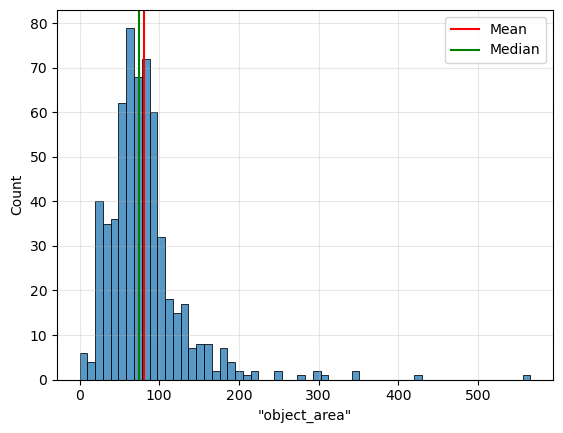

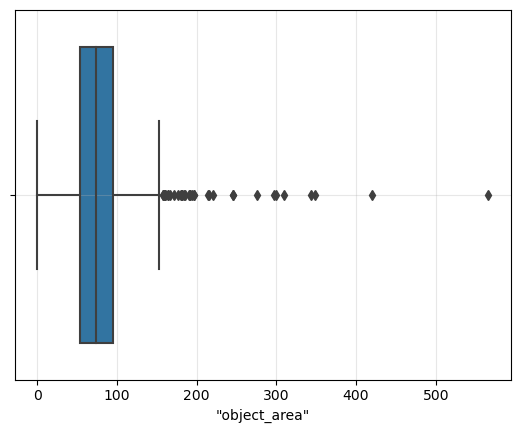

In [150]:
sns.histplot(x='"object_area"', data=df6)
plt.axvline(x=df6['"object_area"'].mean(),
            color='red')
plt.axvline(x=df6['"object_area"'].median(),
            color='green')
plt.legend(labels=['Mean', 'Median'])
plt.grid(alpha=0.3)
plt.show()
plt.close()
sns.boxplot(x='"object_area"', data=df6)
plt.grid(alpha=0.3)
plt.show()

There is a similar picture for the feature "object_price". The distribution is so similar that the correlation must be very high. More on that later.

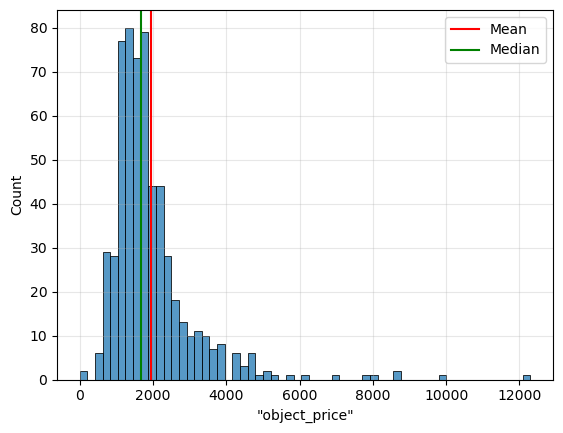

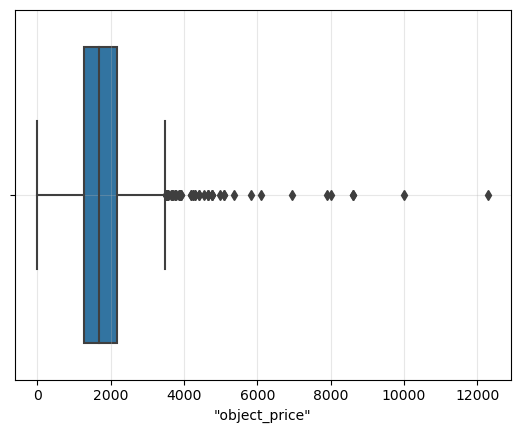

In [152]:
sns.histplot(x='"object_price"', data=df6)
plt.axvline(x=df6['"object_price"'].mean(),
            color='red')
plt.axvline(x=df6['"object_price"'].median(),
            color='green')
plt.legend(labels=['Mean', 'Median'])
plt.grid(alpha=0.3)
plt.show()
plt.close()
sns.boxplot(x='"object_price"', data=df6)
plt.grid(alpha=0.3)
plt.show()

The "object_rooms" has also the same similarity to the other features.

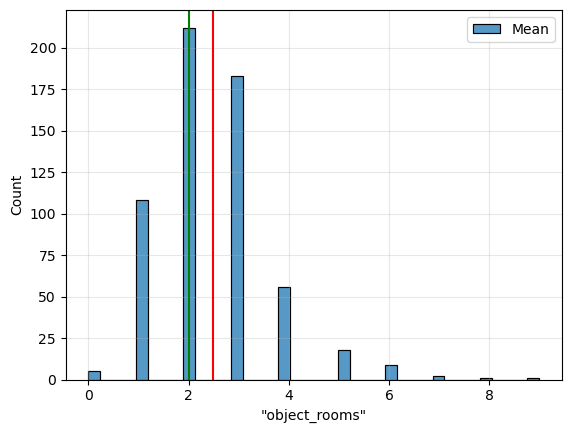

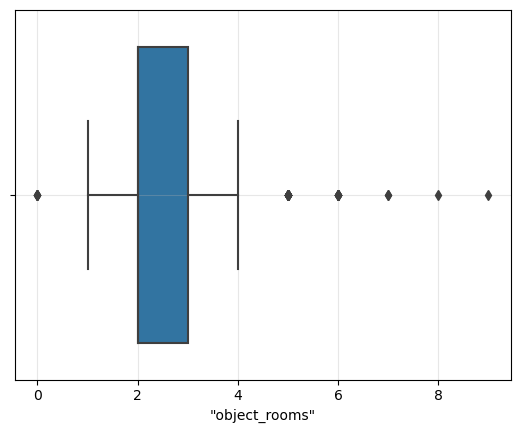

In [154]:
sns.histplot(x='"object_rooms"', data=df6)
plt.legend(labels=['Mean', 'Median'])
plt.axvline(x=df6['"object_rooms"'].mean(),
            color='red')
plt.axvline(x=df6['"object_rooms"'].median(),
            color='green')
plt.grid(alpha=0.3)
plt.show()
plt.close()
sns.boxplot(x='"object_rooms"', data=df6)
plt.grid(alpha=0.3)
plt.show()